# Homework 2 - Machine Learning
## Implementazione dei modelli Ψ_{m,k}, Ψ_{m→n,k}, Ensemble Ψ_{m→n,1}, ecc...
## Stefano Rosini, 291958


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def make_windows(series, m, k):
    X, Y = [], []
    for i in range(len(series) - m - k + 1):
        X.append(series[i : i + m])
        Y.append(series[i + m : i + m + k])
    return np.array(X, dtype=np.float32), np.array(Y, dtype=np.float32)

def make_windows_with_offset(series, m, k, n=0):
    """Sliding window con salto 'n' tra input e target"""
    X, Y = [], []
    offset = m + n
    for i in range(len(series) - offset - k + 1):
        X.append(series[i : i + m])
        Y.append(series[i + offset : i + offset + k])
    return np.array(X, dtype=np.float32), np.array(Y, dtype=np.float32)

def make_windows_with_offset_sym(series, m, k, n=0):
    X, Y = [], []
    offset = m + n
    for i in range(len(series) - offset - k + 1):
        X.append(series[i : i + m])
        Y.append(series[i + offset : i + offset + k])
    return np.array(X), np.array(Y)



def evaluate(model, X, Y):
    preds = model.predict(X)
    rmse = np.sqrt(mean_squared_error(Y, preds))
    mae = mean_absolute_error(Y, preds)
    r2 = r2_score(Y, preds)
    return rmse, mae, r2, preds

def evaluate2(preds, Y):
    rmse = np.sqrt(mean_squared_error(Y, preds))
    mae = mean_absolute_error(Y, preds)
    r2 = r2_score(Y, preds)
    return rmse, mae, r2


def plot_full_series_with_predictions(series_train, series_test, generated, true_future=None):
    full_series = np.concatenate([series_train, series_test])
    plt.figure(figsize=(14, 6))
    plt.plot(full_series, label='Serie Completa', alpha=0.7)

    start = len(series_train) + len(series_test)
    end = start + len(generated)
    
    # Valori predetti
    plt.plot(range(start, end), generated, color='orange', label='Predizioni Future')

    # Se disponibili, sovrapponi i valori reali (target)
    if true_future is not None:
        plt.plot(range(start, end), true_future, color='green', linestyle='--', label='Valori Reali (Target)')

    plt.axvspan(start, end, color='orange', alpha=0.1, label='Zona Predetta')
    plt.title("Andamento della Serie Temporale con Predizioni Future")
    plt.xlabel("Tempo")
    plt.ylabel("Valore")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
def generate_dna_sequence(length=10000, seed=42, noise_level=0.05):
    import random
    random.seed(seed)
    bases = ['A', 'T', 'G', 'C']
    pattern = (bases * (length // 4 + 1))[:length]

    # Aggiungi rumore casuale (5% di variazione)
    for i in range(len(pattern)):
        if random.random() < noise_level:
            pattern[i] = random.choice(bases)
    return pattern

In [4]:
def make_windows_sym(series, m, k):
    X, Y = [], []
    for i in range(len(series) - m - k + 1):
        X.append(series[i : i + m])
        Y.append(series[i + m : i + m + k])
    return np.array(X), np.array(Y)


In [5]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(
        hidden_layer_sizes=(10, 10),
        activation='relu',
        solver='adam',
        learning_rate_init=0.01,
        max_iter=1000,
        random_state=1,
        tol=1e-4,
        n_iter_no_change=50
    )

model_sym = MultiOutputClassifier(
        MLPClassifier(
            hidden_layer_sizes = (512, 256, 128, 64),
            activation='relu',
            solver='adam',
            alpha=0.001,               # ← regolarizzazione più leggera
            learning_rate='adaptive',
            max_iter=50,
            random_state=1,
            early_stopping=True,
            n_iter_no_change=20,
            verbose=True
        )
    )


In [6]:
train_file = r"C:\\Users\\stefa\\Desktop\\ProgettiCaianiello\\Homework2\\train_series_out.txt"
test_file  = r"C:\\Users\\stefa\\Desktop\\ProgettiCaianiello\\Homework2\\test_series_out.txt"
sequence = generate_dna_sequence()


Training Ψ_{m,k} predictor...
Train RMSE: 0.1036, MAE: 0.0825, R^2: 0.9795
 Test RMSE: 0.1093, MAE: 0.0869, R^2: 0.9773

Mean absolute error per timestep:
Step 1: 0.0842
Step 2: 0.0838
Step 3: 0.0884
Step 4: 0.0869
Step 5: 0.0871
Step 6: 0.0848
Step 7: 0.0858
Step 8: 0.0814
Step 9: 0.0856
Step 10: 0.0906
Step 11: 0.0885
Step 12: 0.0890
Step 13: 0.0862
Step 14: 0.0890
Step 15: 0.0906
Step 16: 0.0899
Step 17: 0.0871
Step 18: 0.0874
Step 19: 0.0896
Step 20: 0.0879
Step 21: 0.0838
Step 22: 0.0887
Step 23: 0.0906
Step 24: 0.0862
Step 25: 0.0889
Step 26: 0.0883
Step 27: 0.0874
Step 28: 0.0877
Step 29: 0.0842
Step 30: 0.0852
Step 31: 0.0873
Step 32: 0.0868
Step 33: 0.0846
Step 34: 0.0836
Step 35: 0.0844

Sample input (last window): [np.float32(0.0938), np.float32(0.0737), np.float32(0.2583), np.float32(0.3219), np.float32(0.4383), np.float32(0.5569), np.float32(0.7068), np.float32(0.7226), np.float32(0.9699), np.float32(0.8154), np.float32(0.9324), np.float32(0.9383), np.float32(1.1427), np.f

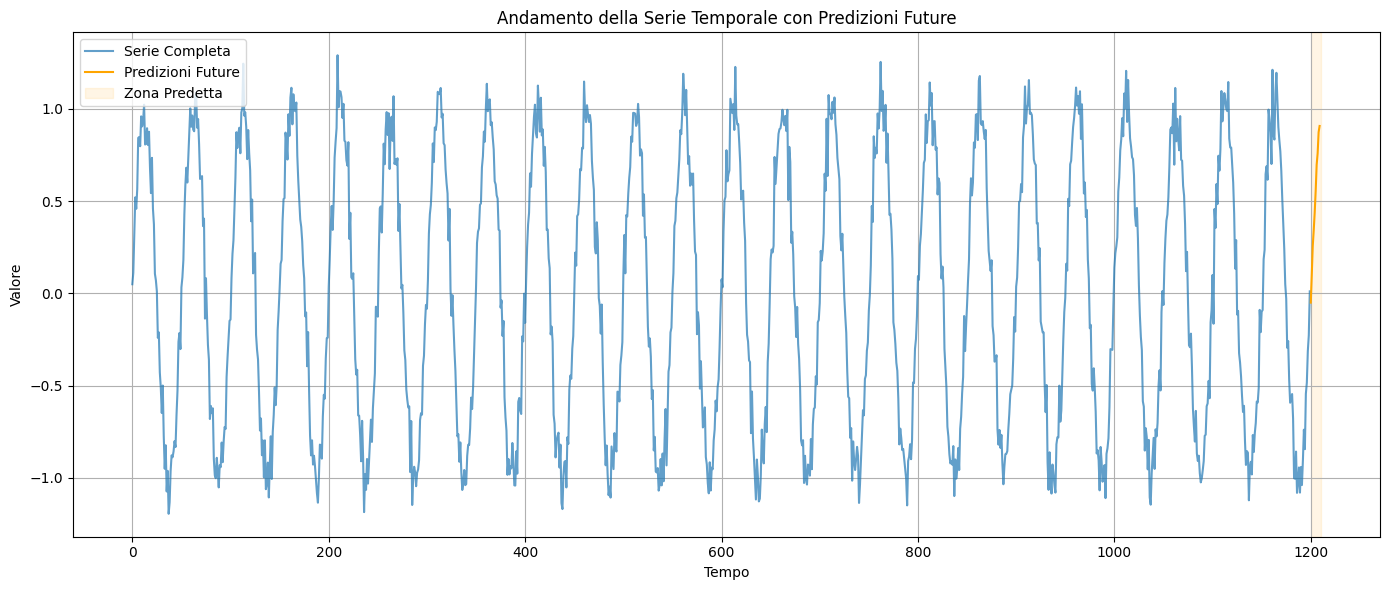

In [13]:
# PUNTO 1   
m = 100
k = 35


series_train = np.loadtxt(train_file, delimiter=',')
series_test  = np.loadtxt(test_file, delimiter=',')

X_train_raw, Y_train_raw = make_windows(series_train, m, k)
X_test_raw,  Y_test_raw  = make_windows(series_test,  m, k)

print("Training Ψ_{m,k} predictor...")
model.fit(X_train_raw, Y_train_raw)

rmse_train, mae_train, r2_train, preds_train = evaluate(model, X_train_raw, Y_train_raw)
rmse_test,  mae_test,  r2_test,  preds_test  = evaluate(model, X_test_raw,  Y_test_raw)

print(f" Test RMSE: {rmse_test:.4f}, MAE: {mae_test:.4f}, R^2: {r2_test:.4f}")

abs_errors = np.abs(Y_test_raw - preds_test)
mean_errors = abs_errors.mean(axis=0)
print("\nMean absolute error per timestep:")
for i, err in enumerate(mean_errors):
    print(f"Step {i+1}: {err:.4f}")

sample_idx = 0
x0 = X_test_raw[sample_idx]
true_y = Y_test_raw[sample_idx]
pred_y = model.predict(x0.reshape(1, -1))[0]

print(f"\nSample input (last window): {[round(v, 4) for v in x0]}")
print(f"True next {k} values:      {[round(v, 4) for v in true_y]}")
print(f"Predicted next {k} values: {[round(v, 4) for v in pred_y]}")

# Autoregressive long-term generation
steps = 10
history = list(series_test[:m])
generated = []
for _ in range(steps):
    inp = np.array(history[-m:], dtype=np.float32).reshape(1, -1)
    out = model.predict(inp)[0]
    generated.append(float(out[0]))
    history.append(out[0])

print(f"\nLong-term generation ({steps} points):")
for i, val in enumerate(generated):
    print(f"Step {i+1}: {val:.5f}")

plot_full_series_with_predictions(series_train, series_test, generated)



In [14]:
def main():
    m = 30
    k = 4
    print("Primi 100 simboli:", sequence[:100])
    print("Lunghezza totale:", len(sequence))


    cut = int(len(sequence) * 0.8)
    train_series = sequence[:cut]
    test_series = sequence[cut - m - k + 1:]

    X_train_raw, Y_train_raw = make_windows_sym(train_series, m, k)
    X_test_raw, Y_test_raw = make_windows_sym(test_series, m, k)

    # One-hot encoding input
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', dtype=int)
    encoder.fit(np.array(sequence).reshape(-1, 1))  # su tutta la sequenza

    def encode(windows):
        flat = windows.reshape(-1, 1)
        encoded = encoder.transform(flat)
        return encoded.reshape(windows.shape[0], -1)

    X_train = encode(X_train_raw)
    X_test = encode(X_test_raw)

    # Mappying symbols into int
    label_set = sorted(set(sequence))
    label_to_int = {lab: i for i, lab in enumerate(label_set)}
    int_to_label = {i: lab for lab, i in label_to_int.items()}

    # Encoding target
    Y_train = np.array([[label_to_int[s] for s in row] for row in Y_train_raw])
    Y_test  = np.array([[label_to_int[s] for s in row] for row in Y_test_raw])

    print("X_train shape:", X_train.shape)
    print("Y_train shape:", Y_train.shape)
    print("Y_test shape:", Y_test.shape)


    print("Training...")
    model_sym.fit(X_train, Y_train)

    pred_train = model_sym.predict(X_train)
    pred_test = model_sym.predict(X_test)

    acc_train = np.mean([accuracy_score(Y_train[:, i], pred_train[:, i]) for i in range(k)])
    acc_test  = np.mean([accuracy_score(Y_test[:, i],  pred_test[:, i])  for i in range(k)])

    print(f"Train Accuracy: {acc_train:.4f}")
    print(f" Test Accuracy: {acc_test:.4f}")

    print("\nSample input:", X_test_raw[0])
    print("True next symbols:", Y_test_raw[0])
    print("Predicted symbols:", [int_to_label[i] for i in pred_test[0]])


if __name__ == "__main__":
    main()


Primi 100 simboli: ['A', 'G', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'T', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'C', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'T', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C']
Lunghezza totale: 10000
X_train shape: (7967, 120)
Y_train shape: (7967, 4)
Y_test shape: (2000, 4)
Training...
Iteration 1, loss = 0.32114350
Validation score: 0.962359
Iteration 2, loss = 0.19432532
Validation score: 0.962359
Iteration 3, loss = 0.19044131
Validation score: 0.962359
Iteration 4, loss = 0.18823205
Validation score: 0.962359
Iteration 5, loss = 0.18735989
Validation score: 0.962359
Iteration 6, loss = 0.18659709
Validation score: 0.962359
Iteration 7, loss = 

# PUNTO 2 NUMERICO


Training Ψ_{m→n,k} with m=100, n=10, k=50 ...

Train RMSE: 0.1046, MAE: 0.0833, R^2: 0.9790
 Test RMSE: 0.1111, MAE: 0.0887, R^2: 0.9763

Mean absolute error per timestep:
Step 1: 0.0815
Step 2: 0.0834
Step 3: 0.0836
Step 4: 0.0843
Step 5: 0.0902
Step 6: 0.0868
Step 7: 0.0865
Step 8: 0.0885
Step 9: 0.0892
Step 10: 0.0879
Step 11: 0.0907
Step 12: 0.0885
Step 13: 0.0870
Step 14: 0.0923
Step 15: 0.0876
Step 16: 0.0879
Step 17: 0.0919
Step 18: 0.0882
Step 19: 0.0871
Step 20: 0.0877
Step 21: 0.0888
Step 22: 0.0892
Step 23: 0.0900
Step 24: 0.0876
Step 25: 0.0895
Step 26: 0.0870
Step 27: 0.0890
Step 28: 0.0876
Step 29: 0.0856
Step 30: 0.0908
Step 31: 0.0874
Step 32: 0.0869
Step 33: 0.0847
Step 34: 0.0877
Step 35: 0.0912
Step 36: 0.0940
Step 37: 0.0928
Step 38: 0.0869
Step 39: 0.0941
Step 40: 0.0891
Step 41: 0.0902
Step 42: 0.0904
Step 43: 0.0908
Step 44: 0.0883
Step 45: 0.0941
Step 46: 0.0920
Step 47: 0.0866
Step 48: 0.0893
Step 49: 0.0906
Step 50: 0.0926

Sample input: [np.float32(0.0938), 

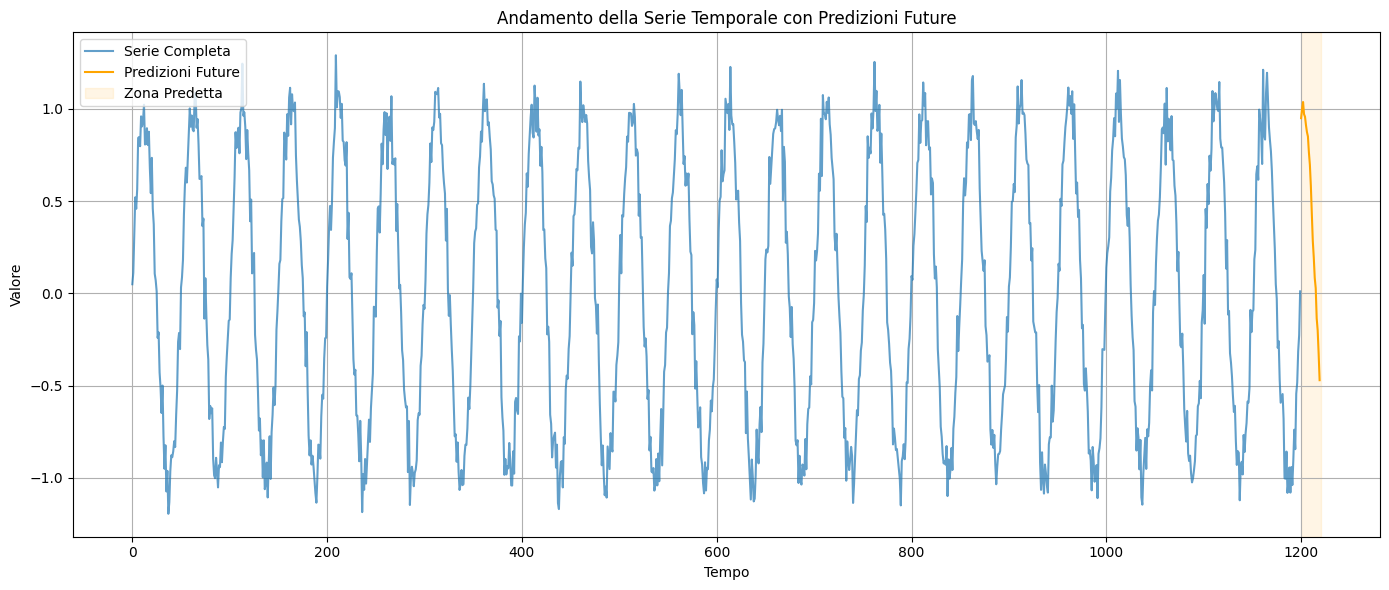

In [15]:
def main():
    m = 100   # Input window size
    k = 50    # Output window size
    n = 10    # Offset (quanti passi avanti predire)

    series_train = np.loadtxt(train_file, delimiter=',')
    series_test  = np.loadtxt(test_file, delimiter=',')

    # Sliding window con offset n
    X_train, Y_train = make_windows_with_offset(series_train, m, k, n)
    X_test,  Y_test  = make_windows_with_offset(series_test,  m, k, n)

    print(f"\nTraining Ψ_{{m→n,k}} with m={m}, n={n}, k={k} ...")
    
    # Training
    model.fit(X_train, Y_train)

    rmse_train, mae_train, r2_train, preds_train = evaluate(model, X_train, Y_train)
    rmse_test,  mae_test,  r2_test,  preds_test  = evaluate(model, X_test,  Y_test)

    print(f"\nTrain RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}, R^2: {r2_train:.4f}")
    print(f" Test RMSE: {rmse_test:.4f}, MAE: {mae_test:.4f}, R^2: {r2_test:.4f}")

    abs_errors = np.abs(Y_test - preds_test)
    mean_errors = abs_errors.mean(axis=0)
    print("\nMean absolute error per timestep:")
    for i, err in enumerate(mean_errors):
        print(f"Step {i+1}: {err:.4f}")

    sample_idx = 0
    x0 = X_test[sample_idx]
    true_y = Y_test[sample_idx]
    pred_y = model.predict(x0.reshape(1, -1))[0]
    print(f"\nSample input: {[round(v, 4) for v in x0]}")
    print(f"True next {k} values (after offset n={n}): {[round(v, 4) for v in true_y]}")
    print(f"Predicted next {k} values:              {[round(v, 4) for v in pred_y]}")

    # Autoregressive generation (still uses standard Ψ for demonstration)
    steps = 20
    history = list(series_test[:m])
    generated = []
    for _ in range(steps):
        inp = np.array(history[-m:], dtype=np.float32).reshape(1, -1)
        out = model.predict(inp)[0]
        generated.append(float(out[0]))
        history.append(out[0])

    print(f"\nLong-term generation ({steps} steps):")
    for i, val in enumerate(generated):
        print(f"Step {i+1}: {val:.5f}")

    plot_full_series_with_predictions(series_train, series_test, generated)

# ---------------------------------------------------------

if __name__ == "__main__":
    main()


# Punto 2 Simbolica

In [16]:

def main():
    m = 20
    k = 10
    n = 5  # salto in avanti per predizione

    sequence = generate_dna_sequence()
    print("Primi 100 simboli:", sequence[:100])
    print("Lunghezza totale:", len(sequence))

    cut = int(len(sequence) * 0.8)
    train_series = sequence[cut:]
    test_series = sequence[:cut - (m + n + k - 1)]  # serve contesto anche per test

    X_train_raw, Y_train_raw = make_windows_with_offset_sym(train_series, m, k, n)
    X_test_raw,  Y_test_raw  = make_windows_with_offset_sym(test_series, m, k, n)

    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', dtype=int)
    encoder.fit(np.array(sequence).reshape(-1, 1))

    def encode(windows):
        flat = windows.reshape(-1, 1)
        encoded = encoder.transform(flat)
        return encoded.reshape(windows.shape[0], -1)

    X_train = encode(X_train_raw)
    X_test = encode(X_test_raw)

    label_set = sorted(set(sequence))
    label_to_int = {lab: i for i, lab in enumerate(label_set)}
    int_to_label = {i: lab for lab, i in label_to_int.items()}

    Y_train = np.array([[label_to_int[s] for s in row] for row in Y_train_raw])
    Y_test  = np.array([[label_to_int[s] for s in row] for row in Y_test_raw])

    print("X_train shape:", X_train.shape)
    print("Y_train shape:", Y_train.shape)
    print("Y_test shape:",  Y_test.shape)

    print("Training Ψ_{m→n,k} predictor...")
    model_sym.fit(X_train, Y_train)

    pred_train = model_sym.predict(X_train)
    pred_test = model_sym.predict(X_test)

    acc_train = np.mean([accuracy_score(Y_train[:, i], pred_train[:, i]) for i in range(k)])
    acc_test  = np.mean([accuracy_score(Y_test[:, i],  pred_test[:, i])  for i in range(k)])

    print(f"Train Accuracy: {acc_train:.4f}")
    print(f" Test Accuracy: {acc_test:.4f}")

    print("\nSample input:", X_test_raw[0])
    print("True next symbols after offset:", Y_test_raw[0])
    print("Predicted symbols:", [int_to_label[i] for i in pred_test[0]])

# ------------------------

if __name__ == "__main__":
    main()

Primi 100 simboli: ['A', 'G', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'T', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'C', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'T', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C', 'A', 'T', 'G', 'C']
Lunghezza totale: 10000
X_train shape: (1966, 80)
Y_train shape: (1966, 10)
Y_test shape: (7932, 10)
Training Ψ_{m→n,k} predictor...
Iteration 1, loss = 0.73682916
Validation score: 0.974619
Iteration 2, loss = 0.27822133
Validation score: 0.974619
Iteration 3, loss = 0.25023859
Validation score: 0.974619
Iteration 4, loss = 0.24350169
Validation score: 0.974619
Iteration 5, loss = 0.23866291
Validation score: 0.974619
Iteration 6, loss = 0.23320071
Validation score: 0.974619

# Punto 3

In [7]:


train_file = r"C:\\Users\\stefa\\Desktop\\ProgettiCaianiello\\Homework2\\train_series_out.txt"
test_file  = r"C:\\Users\\stefa\\Desktop\\ProgettiCaianiello\\Homework2\\test_series_out.txt"

series_train = np.loadtxt(train_file, delimiter=',')
series_test  = np.loadtxt(test_file, delimiter=',')


m = 100  # input window size
k = 10   # output size (and ensemble depth)


ensemble_preds_list = []

for n in range(1, k + 1):
    X_train, Y_train = make_windows_with_offset(series_train, m, k=1, n=n)
    X_test,  Y_test  = make_windows_with_offset(series_test,  m, k=1, n=n)

    model.fit(X_train, Y_train.ravel())
    preds = model.predict(X_test)
    ensemble_preds_list.append(preds)

# Allinea e media
min_len = min(map(len, ensemble_preds_list))
ensemble_preds = np.mean([p[:min_len] for p in ensemble_preds_list], axis=0)
ensemble_targets = make_windows_with_offset(series_test, m, k=1, n=k)[1][:min_len].ravel()



# Punto 4

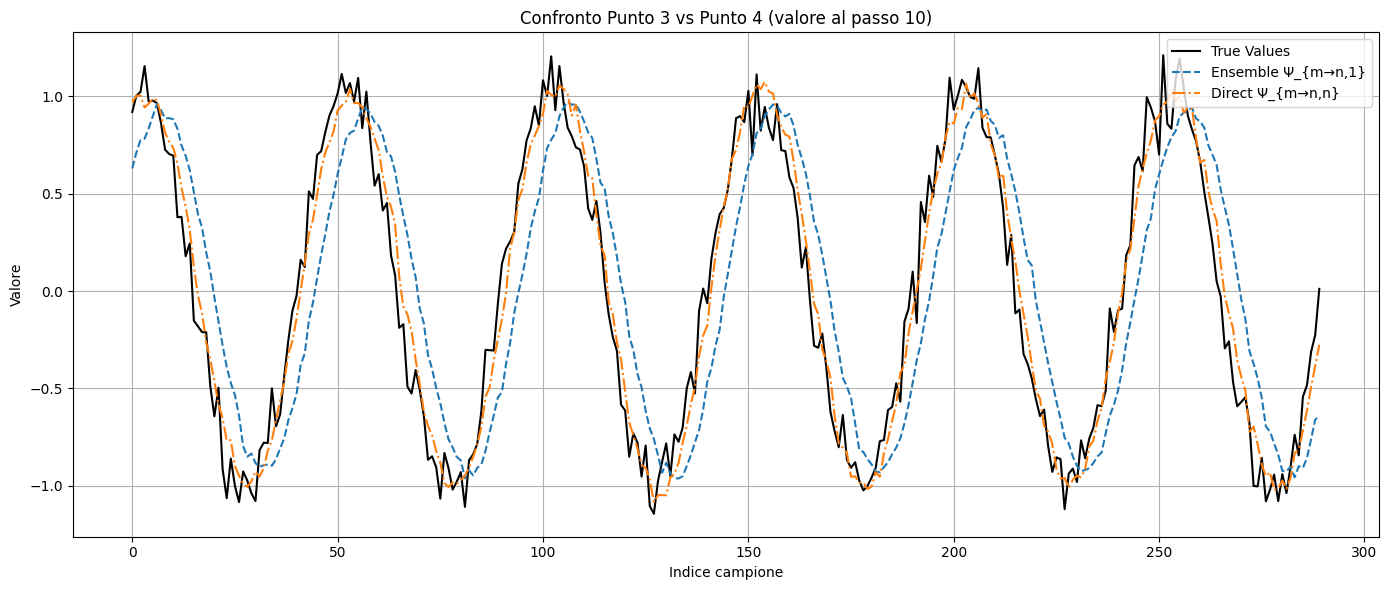


[Confronto Metriche (valore al passo 10)]
Ensemble Ψ_{m→n,1}:     RMSE=0.3985, MAE=0.3509, R2=0.7014
Direct Ψ_{m→n,n}:       RMSE=0.1086, MAE=0.0856, R2=0.9780


In [19]:

X_train4, Y_train4 = make_windows(series_train, m, k)
X_test4,  Y_test4  = make_windows(series_test,  m, k)

model.fit(X_train4, Y_train4)
y_pred4 = model.predict(X_test4)

# Confronta valore al passo k (ultimo passo)
direct_preds = y_pred4[:min_len, -1]
direct_targets = Y_test4[:min_len, -1]


plt.figure(figsize=(14, 6))
plt.plot(ensemble_targets, label="True Values", color="black", linewidth=1.5)
plt.plot(ensemble_preds, label="Ensemble Ψ_{m→n,1}", linestyle='--')
plt.plot(direct_preds, label="Direct Ψ_{m→n,n}", linestyle='-.')
plt.title(f"Confronto Punto 3 vs Punto 4 (valore al passo {k})")
plt.xlabel("Indice campione")
plt.ylabel("Valore")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


rmse_ens, mae_ens, r2_ens = evaluate2(ensemble_preds, ensemble_targets)
rmse_dir, mae_dir, r2_dir = evaluate2(direct_preds, direct_targets)

print(f"\n[Confronto Metriche (valore al passo {k})]")
print(f"Ensemble Ψ_{{m→n,1}}:     RMSE={rmse_ens:.4f}, MAE={mae_ens:.4f}, R2={r2_ens:.4f}")
print(f"Direct Ψ_{{m→n,n}}:       RMSE={rmse_dir:.4f}, MAE={mae_dir:.4f}, R2={r2_dir:.4f}")

# Punto 5

In [20]:

m = 30
k = 4
# Split
cut = int(len(sequence) * 0.8)
train_series = sequence[:cut]
test_series = sequence[cut - m - k + 1:]

# Finestre input/output
X_train_raw, Y_train_raw = make_windows_sym(train_series, m, k)
X_test_raw, Y_test_raw = make_windows_sym(test_series, m, k)

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', dtype=int)
encoder.fit(np.array(sequence).reshape(-1, 1))

def encode(windows):
    flat = windows.reshape(-1, 1)
    encoded = encoder.transform(flat)
    return encoded.reshape(windows.shape[0], -1)

X_train = encode(X_train_raw)
X_test = encode(X_test_raw)

label_set = sorted(set(sequence))
label_to_int = {lab: i for i, lab in enumerate(label_set)}
int_to_label = {i: lab for lab, i in label_to_int.items()}

Y_train = np.array([[label_to_int[s] for s in row] for row in Y_train_raw])
Y_test  = np.array([[label_to_int[s] for s in row] for row in Y_test_raw])


print("Training Ψ_{m,k}...")
model_sym.fit(X_train, Y_train)


# Punto 5: Generazione 

steps = 100
generated = list(test_series[:m])  # target serie to predict

print("\nGenerazione a lungo termine:")

for _ in range(steps // k):
    window = np.array(generated[-m:]).reshape(1, -1)
    encoded_window = encoder.transform(window.T).reshape(1, -1)

    pred_indices = model_sym.predict(encoded_window)[0]
    pred_symbols = [int_to_label[i] for i in pred_indices]

    generated.extend(pred_symbols)

print("\nSequenza generata (primi 100 simboli):")
print("".join(generated[m:m+100]))

true_sequence = test_series[m:m+steps]

pred_sequence = generated[m:m+steps]

correct = sum(1 for p, t in zip(pred_sequence, true_sequence) if p == t)
accuracy = correct / len(true_sequence)

print(f"Accuracy simbolica (su {steps} passi): {accuracy:.4f}")

Training Ψ_{m,k}...
Iteration 1, loss = 0.32114350
Validation score: 0.962359
Iteration 2, loss = 0.19432532
Validation score: 0.962359
Iteration 3, loss = 0.19044131
Validation score: 0.962359
Iteration 4, loss = 0.18823205
Validation score: 0.962359
Iteration 5, loss = 0.18735989
Validation score: 0.962359
Iteration 6, loss = 0.18659709
Validation score: 0.962359
Iteration 7, loss = 0.18736461
Validation score: 0.962359
Iteration 8, loss = 0.18290860
Validation score: 0.962359
Iteration 9, loss = 0.18263211
Validation score: 0.962359
Iteration 10, loss = 0.17989267
Validation score: 0.962359
Iteration 11, loss = 0.17802906
Validation score: 0.962359
Iteration 12, loss = 0.17629510
Validation score: 0.962359
Iteration 13, loss = 0.17288671
Validation score: 0.962359
Iteration 14, loss = 0.17475518
Validation score: 0.962359
Iteration 15, loss = 0.17281890
Validation score: 0.962359
Iteration 16, loss = 0.17082833
Validation score: 0.962359
Iteration 17, loss = 0.16758951
Validation sc